In [40]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import squarify
import seaborn

In [41]:
color_agents = ['#f9c74f','#f8961e', '#f3722c', '#f94144']
colors = ['#264653', '#2a9d8f', '#e9c46a','#f4a261','#e76f51']

df0 = pd.read_csv('/home/lorenzo/Desktop/master_thesis/scripts/eval/data_out/US.csv')
df1 = pd.read_csv('/home/lorenzo/Desktop/master_thesis/scripts/eval/data_out/Ita.csv')
df2 = pd.read_csv('/home/lorenzo/Desktop/master_thesis/scripts/eval/data_out/Free.csv')
df3 = pd.read_csv('/home/lorenzo/Desktop/master_thesis/scripts/eval/data_out/Comm.csv')

data = [df0,df1,df2,df3]
labels = ['US','Italy','Free market', 'Communism']

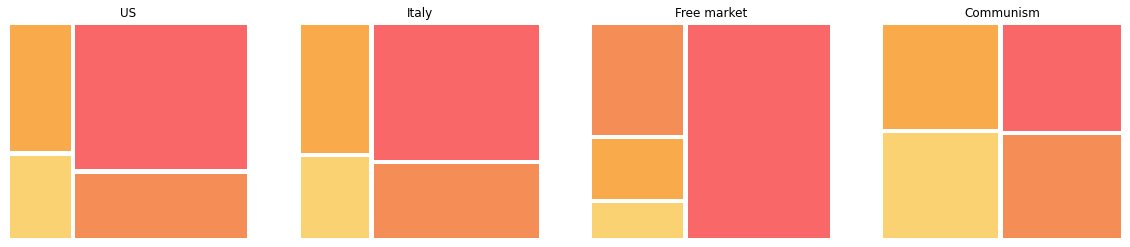

In [42]:
fig, ax = plt.subplots(1,4,figsize=(20, 4))

for idx, d in enumerate(data):
    df_temp = d[['endow/0/Coin', 'endow/1/Coin','endow/2/Coin','endow/3/Coin']]
    df_temp.values.sort()
    df_temp = df_temp.describe()

    ax[idx].set_title(labels[idx])
    squarify.plot(sizes=df_temp.loc['mean'].values, alpha=.8, color=color_agents, ax=ax[idx],pad=True)
    ax[idx].axis('off')


plt.show()

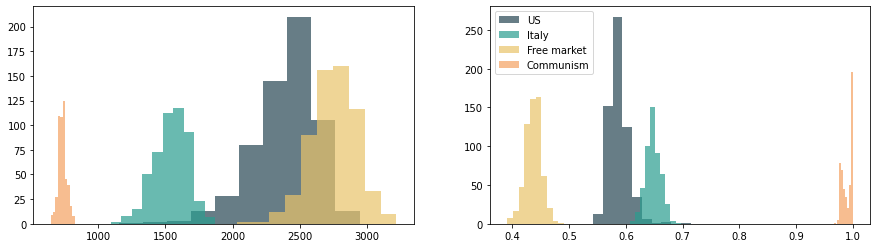

In [43]:
keys = ['social/productivity','social/equality']
fig, ax = plt.subplots(1,2, figsize = (15,4))

for idx, key in enumerate(keys):
    for idx2, d in enumerate(data):
        ax[idx].hist(d[key].values, alpha = 0.7, color = colors[idx2], label=labels[idx2])

plt.legend()
plt.show()

<ipython-input-52-6c8d0c7d44ac>:13: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
  ax.errorbar(points.loc[0].values, points.loc[1].values, yerr=list(sd.loc[1].values),  xerr=list(sd.loc[0].values), fmt='o', lw = 1, zorder=0)


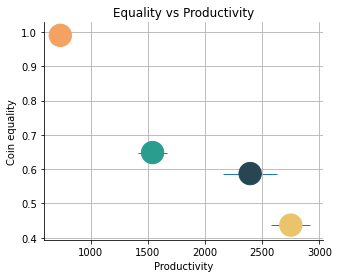

In [52]:
points = pd.DataFrame()
for d in data:
    a = list(d[['social/productivity','social/equality']].describe().values[1])
    points = points.append(a)

sd = pd.DataFrame()
for d in data:
    a = list(d[['social/productivity','social/equality']].describe().values[2])
    sd = sd.append(a)


fig,ax = plt.subplots(figsize=(5, 4))
ax.errorbar(points.loc[0].values, points.loc[1].values, yerr=list(sd.loc[1].values),  xerr=list(sd.loc[0].values), fmt='o', lw = 1, zorder=0)
ax.scatter(points.loc[0], points.loc[1], color= colors[0:4], marker = 'o', zorder=10, s = 500)
plt.xlabel('Productivity')
plt.ylabel('Coin equality')
ax.grid(True, which='both')
plt.title('Equality vs Productivity')
seaborn.despine(ax=ax, offset=0) 



<BarContainer object of 4 artists>

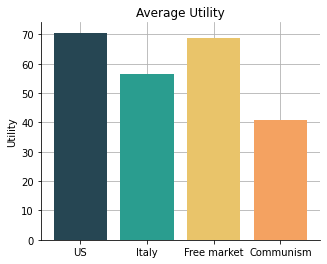

In [55]:
fig, ax = plt.subplots(figsize=(5, 4))

values = []
for d in data:
    df_temp = d[['util/0', 'util/1','util/2','util/3']]
    values.append(df_temp.mean().values.mean())

plt.title('Average Utility')
plt.ylabel('Utility')
seaborn.despine(ax=ax, offset=0) 
ax.grid(True)
ax.bar(['US', 'Italy', 'Free market', 'Communism'],values, color=colors[0:4],zorder = 10)
